# **Current status of the loan Prediction using SVC**

In [91]:
# import nessary librarys
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# read The Dataset
df = pd.read_csv('LoanDataset - LoansDatasest.csv')

In [5]:
# first five row of data
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


 **EDA(Exploratory data analysis)**

In [6]:
# shape of data
df.shape

(32586, 13)

In [7]:
# column name of  data
df.columns.tolist()

['customer_id',
 'customer_age',
 'customer_income',
 'home_ownership',
 'employment_duration',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'term_years',
 'historical_default',
 'cred_hist_length',
 'Current_loan_status']

In [8]:
# The dataset consists of the following columns:

# **customer_id: Unique identifier for each customer
# **customer_age: Age of the customer
# **customer_income: Annual income of the customer
# **home_ownership: Home ownership status (e.g., RENT, OWN, MORTGAGE)
# **employment_duration: Duration of employment in months
# **loan_intent: Purpose of the loan (e.g., PERSONAL, EDUCATION, MEDICAL, VENTURE)
# **loan_grade: Grade assigned to the loan
# **loan_amnt: Loan amount requested
# **loan_int_rate: Interest rate of the loan
# **term_years: Loan term in years
# **historical_default: Indicates if the customer has a history of default (Y/N)
# **cred_hist_length: Length of the customer's credit history in years
# **Current_loan_status: Current status of the loan (DEFAULT, NO DEFAULT)

In [9]:
# Target column value count
df['Current_loan_status'].value_counts()

Current_loan_status
NO DEFAULT    25742
DEFAULT        6840
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Current_loan_status'>

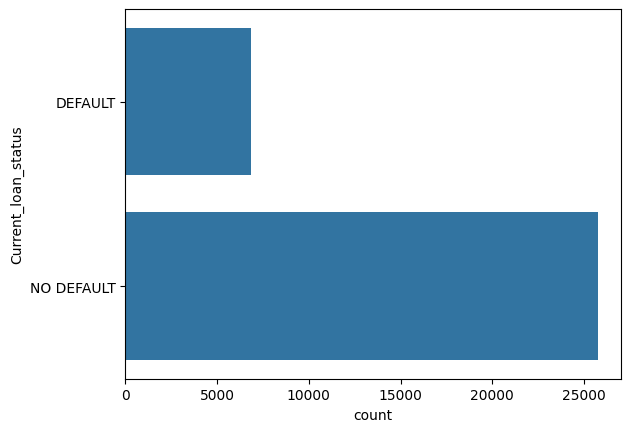

In [10]:
sns.countplot(df['Current_loan_status'])

In [11]:
# chech the null values in dataset
df.isnull().sum()

customer_id                3
customer_age               0
customer_income            0
home_ownership             0
employment_duration      895
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate           3116
term_years                 0
historical_default     20737
cred_hist_length           0
Current_loan_status        4
dtype: int64

In [12]:
# data type of every column
df.dtypes

customer_id            float64
customer_age             int64
customer_income         object
home_ownership          object
employment_duration    float64
loan_intent             object
loan_grade              object
loan_amnt               object
loan_int_rate          float64
term_years               int64
historical_default      object
cred_hist_length         int64
Current_loan_status     object
dtype: object

In [13]:
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [14]:
# only print the difult data
df[df['Current_loan_status'] == 'DEFAULT']

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT
5,6.0,21,9900,OWN,2.0,VENTURE,A,"£2,500.00",7.14,1,N,2,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,32564.0,52,71520,RENT,0.0,EDUCATION,D,"£7,000.00",16.82,2,Y,24,DEFAULT
32570,32566.0,57,40000,RENT,1.0,MEDICAL,A,"£15,000.00",8.90,7,N,21,DEFAULT
32576,32572.0,60,45600,RENT,1.0,VENTURE,B,"£20,000.00",10.00,6,N,26,DEFAULT
32579,32575.0,52,65004,RENT,4.0,PERSONAL,D,"£20,000.00",15.58,2,Y,19,DEFAULT


In [15]:
# only print the difult data
df[df['Current_loan_status'] == 'NO DEFAULT']

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
6,7.0,26,77100,RENT,8.0,EDUCATION,A,"£35,000.00",12.42,10,NaN,3,NO DEFAULT
7,8.0,24,78956,RENT,5.0,MEDICAL,A,"£35,000.00",11.11,10,NaN,4,NO DEFAULT
8,9.0,24,83000,RENT,8.0,PERSONAL,A,"£35,000.00",8.90,10,NaN,2,NO DEFAULT
10,11.0,22,85000,RENT,6.0,VENTURE,A,"£35,000.00",10.37,10,NaN,4,NO DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32580,32576.0,52,64500,RENT,0.0,EDUCATION,B,"£5,000.00",11.26,2,NaN,20,NO DEFAULT
32581,32577.0,57,53000,MORTGAGE,1.0,PERSONAL,C,"£5,800.00",13.16,7,NaN,30,NO DEFAULT
32582,32578.0,54,120000,MORTGAGE,4.0,PERSONAL,A,"£17,625.00",7.49,4,NaN,19,NO DEFAULT
32584,32580.0,56,150000,MORTGAGE,5.0,PERSONAL,B,"£15,000.00",11.48,6,NaN,26,NO DEFAULT


In [16]:
# check The duplicate values
df.duplicated().T

0        False
1        False
2        False
3        False
4        False
         ...  
32581    False
32582    False
32583    False
32584    False
32585    False
Length: 32586, dtype: bool

In [17]:
# check The duplicate values
df.duplicated().sum()

6

In [18]:
# remove the duplicates
df = df.drop_duplicates()

In [19]:
# check The duplicate values
df.duplicated().sum()

0

In [20]:
df.shape

(32580, 13)

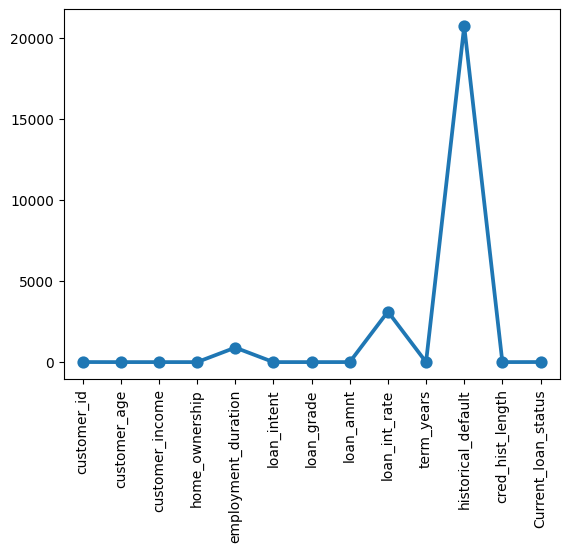

In [21]:
# null values pointplot
sns.pointplot(df.isnull().sum())
plt.xticks(rotation=90)
plt.show()

In [22]:
df.dtypes

customer_id            float64
customer_age             int64
customer_income         object
home_ownership          object
employment_duration    float64
loan_intent             object
loan_grade              object
loan_amnt               object
loan_int_rate          float64
term_years               int64
historical_default      object
cred_hist_length         int64
Current_loan_status     object
dtype: object

In [23]:
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [24]:
# convert a data types object to int
df['customer_income'] = df['customer_income'].str.replace(',', '').astype('float64')

In [25]:
df['loan_amnt'] = df['loan_amnt'].str.replace('[£,]', '', regex=True).astype('float64')

In [26]:
df.dtypes

customer_id            float64
customer_age             int64
customer_income        float64
home_ownership          object
employment_duration    float64
loan_intent             object
loan_grade              object
loan_amnt              float64
loan_int_rate          float64
term_years               int64
historical_default      object
cred_hist_length         int64
Current_loan_status     object
dtype: object

In [27]:
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000.0,RENT,123.0,PERSONAL,C,35000.0,16.02,10,Y,3,DEFAULT
1,2.0,21,9600.0,OWN,5.0,EDUCATION,A,1000.0,11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600.0,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,N,3,DEFAULT
3,4.0,23,65500.0,RENT,4.0,MEDICAL,B,35000.0,15.23,10,N,2,DEFAULT
4,5.0,24,54400.0,RENT,8.0,MEDICAL,B,35000.0,14.27,10,Y,4,DEFAULT


In [28]:
# chek The null Values
df.isnull().sum()

customer_id                3
customer_age               0
customer_income            0
home_ownership             0
employment_duration      895
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate           3116
term_years                 0
historical_default     20736
cred_hist_length           0
Current_loan_status        4
dtype: int64

In [29]:
# fill the null values
df.ffill(inplace=True)

In [30]:
# chek The null Values
df.isnull().sum()

customer_id            0
customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
term_years             0
historical_default     0
cred_hist_length       0
Current_loan_status    0
dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
# Apply LabelEncoder to convert object to numaric
le = LabelEncoder()
for i in df.select_dtypes('object').columns:
    df[i] = le.fit_transform(df[i])

In [33]:
df.dtypes

customer_id            float64
customer_age             int64
customer_income        float64
home_ownership           int64
employment_duration    float64
loan_intent              int64
loan_grade               int64
loan_amnt              float64
loan_int_rate          float64
term_years               int64
historical_default       int64
cred_hist_length         int64
Current_loan_status      int64
dtype: object

In [34]:
# Target columns value counts
df['Current_loan_status'].value_counts()

Current_loan_status
1    25744
0     6836
Name: count, dtype: int64

NO DEFAULT    1


DEFAULT       0

In [35]:
df.corr()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
customer_id,1.000000,0.732527,0.170492,-0.129660,0.186380,0.034477,0.234462,0.028727,0.001718,0.143766,-0.035417,0.772899,0.067827
customer_age,0.732527,1.000000,0.173103,-0.032078,0.161103,0.035787,0.215889,0.015528,0.012880,0.136094,-0.075662,0.857437,0.028970
customer_income,0.170492,0.173103,1.000000,-0.203181,0.134642,0.001524,0.015316,0.081654,0.001129,0.059348,0.038723,0.117992,0.140643
home_ownership,-0.129660,-0.032078,-0.203181,1.000000,-0.228701,0.010964,0.117793,-0.033261,0.128324,-0.009877,-0.026770,-0.025601,-0.218743
employment_duration,0.186380,0.161103,0.134642,-0.228701,1.000000,0.020861,-0.004220,0.034644,-0.049334,0.076882,-0.002986,0.143357,0.085768
loan_intent,0.034477,0.035787,0.001524,0.010964,0.020861,1.000000,-0.000099,0.003288,-0.000373,0.015014,0.017039,0.035156,0.081463
loan_grade,0.234462,0.215889,0.015316,0.117793,-0.004220,-0.000099,1.000000,0.032546,0.749802,0.101055,0.083288,0.232721,-0.365583
loan_amnt,0.028727,0.015528,0.081654,-0.033261,0.034644,0.003288,0.032546,1.000000,0.035880,0.077012,-0.005009,0.011518,-0.028038
loan_int_rate,0.001718,0.012880,0.001129,0.128324,-0.049334,-0.000373,0.749802,0.035880,1.000000,0.041197,0.091271,0.016189,-0.308003
term_years,0.143766,0.136094,0.059348,-0.009877,0.076882,0.015014,0.101055,0.077012,0.041197,1.000000,-0.022956,0.182555,-0.033953


<Axes: >

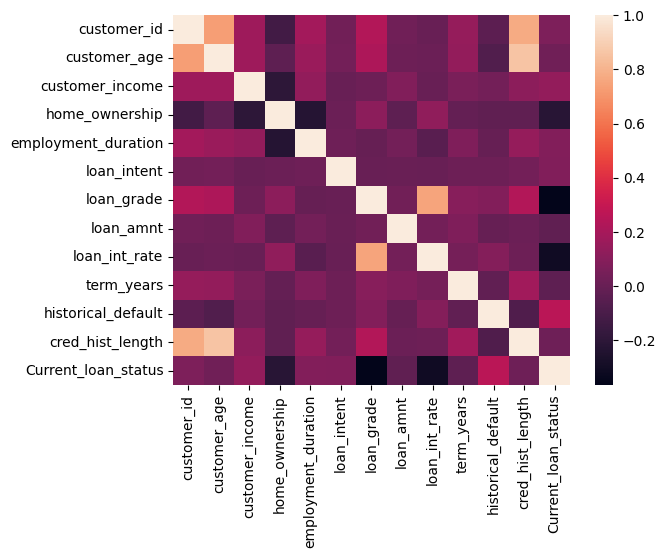

In [36]:
# heat map of corilation
sns.heatmap(df.corr())

In [37]:
# Stastical Representation of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,32580.0,16290.570258,9405.293459,1.00,8145.75,16290.50,24435.25,32581.00
customer_age,32580.0,27.732290,6.359318,3.00,23.00,26.00,30.00,144.00
customer_income,32580.0,66074.727993,61984.066620,4000.00,38500.00,55000.00,79200.00,6000000.00
home_ownership,32580.0,1.676182,1.433119,0.00,0.00,3.00,3.00,3.00
employment_duration,32580.0,4.778484,4.138529,0.00,2.00,4.00,7.00,123.00
loan_intent,32580.0,2.533763,1.731154,0.00,1.00,3.00,4.00,5.00
loan_grade,32580.0,0.860129,1.009571,0.00,0.00,1.00,1.00,4.00
loan_amnt,32580.0,9725.730510,21070.910353,500.00,5000.00,8000.00,12200.00,3500000.00
loan_int_rate,32580.0,11.013700,3.239177,5.42,7.90,10.99,13.47,23.22
term_years,32580.0,4.761572,2.470824,1.00,3.00,4.00,7.00,10.00


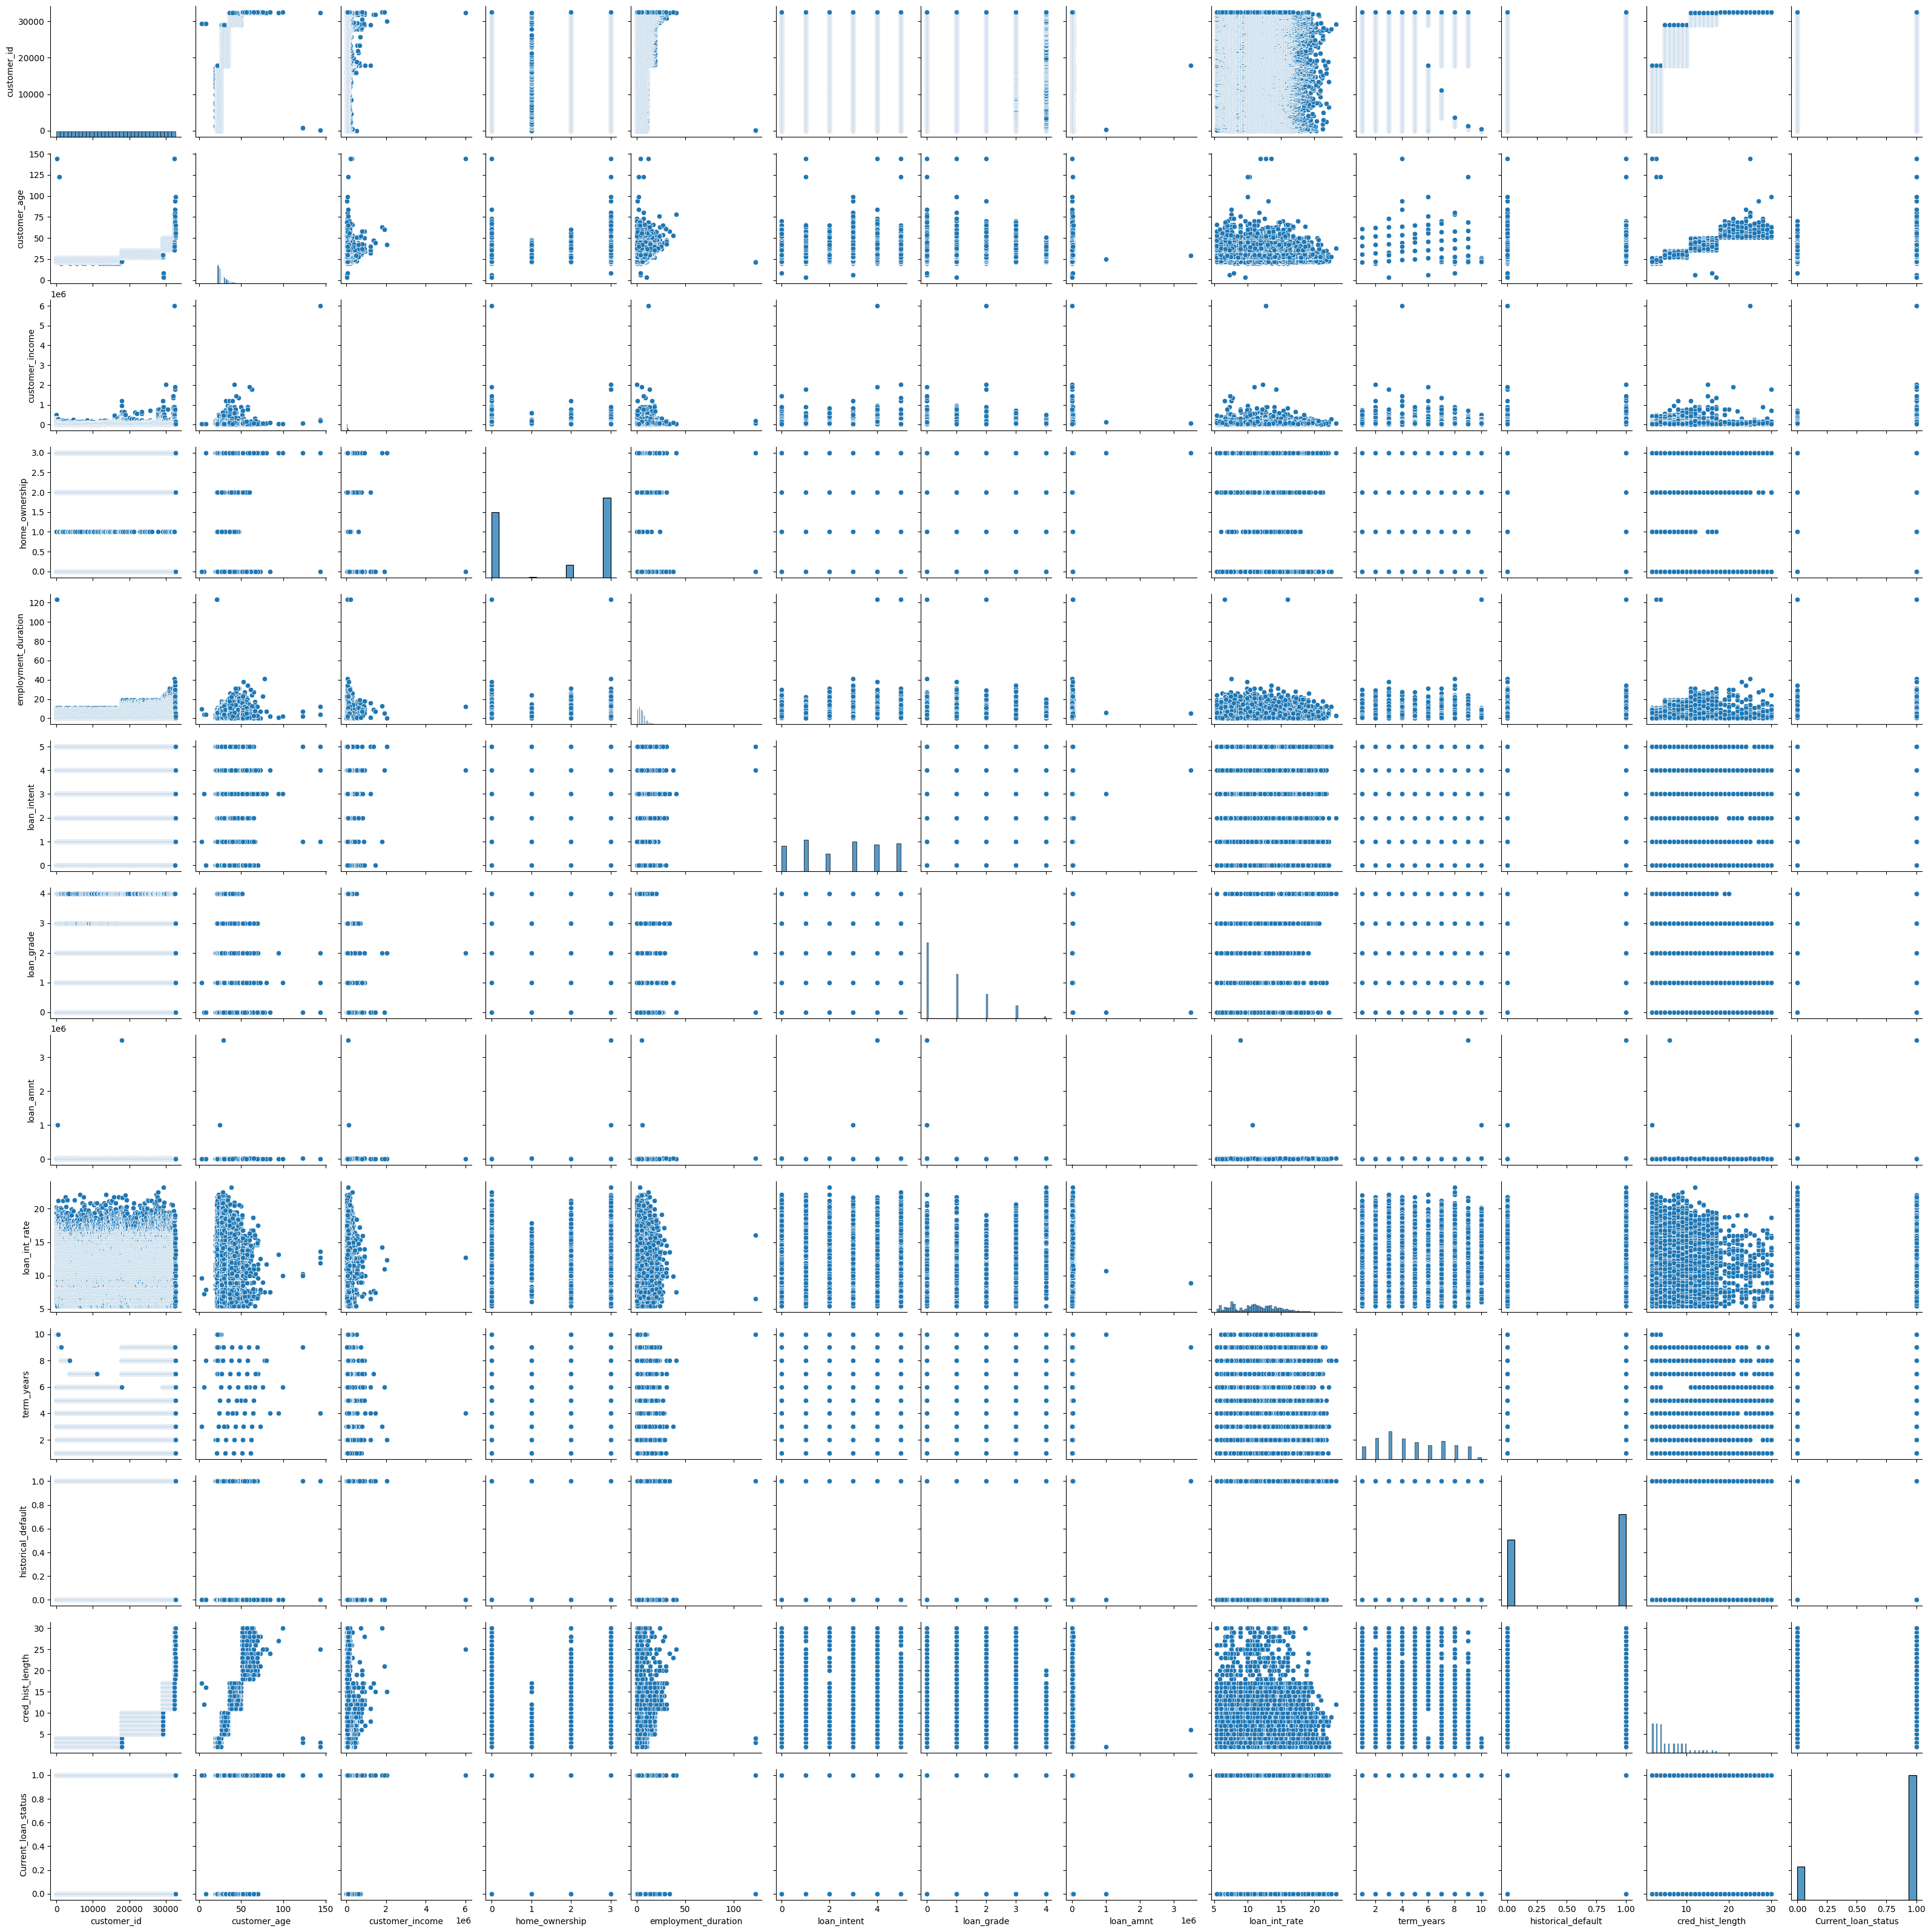

In [38]:
sns.pairplot(df)

In [39]:
# Target columns value counts
df['Current_loan_status'].value_counts()

Current_loan_status
1    25744
0     6836
Name: count, dtype: int64

In [40]:
# divide data into target column
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [41]:
x.columns

Index(['customer_id', 'customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'term_years', 'historical_default',
       'cred_hist_length'],
      dtype='object')

In [42]:
y.value_counts()

Current_loan_status
1    25744
0     6836
Name: count, dtype: int64

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
sm = SMOTE()
a,b = sm.fit_resample(x,y)

In [45]:
b.value_counts()

Current_loan_status
0    25744
1    25744
Name: count, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(a,b, test_size = 0.3, random_state = 42)

In [48]:
x_train.shape

(36041, 12)

In [49]:
y_train.shape

(36041,)

In [50]:
x_test.shape

(15447, 12)

In [51]:
y_test.shape

(15447,)

**Model Train**

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score,roc_auc_score

In [53]:
from tabulate import tabulate

In [59]:
sv = SVC()
sv = sv.fit(x_train[:5000], y_train[:5000])


# Make predictions
sv_pred = sv.predict(x_test)
# sv_pred_proba = sv.predict_proba(x_test)[:, 1]

# Calculate metrics
sv_ac = accuracy_score(y_test, sv_pred)
sv_pr = precision_score(y_test, sv_pred)
sv_re = recall_score(y_test, sv_pred)
sv_f1 = f1_score(y_test, sv_pred)
# sv_roc_auc = roc_auc_score(y_test, sv_pred_proba)

# Create a table
table = [["Accuracy", sv_ac],
         ["Precision", sv_pr],
         ["Recall", sv_re],
         ["F1 Score", sv_f1]]
        #  ["ROC AUC Score", sv_roc_auc]]

# Print the table
print(tabulate(table, headers=["Metric", "Score"], tablefmt="grid"))

+-----------+----------+
| Metric    |    Score |
+===========+==========+
| Accuracy  | 0.681427 |
+-----------+----------+
| Precision | 0.677297 |
+-----------+----------+
| Recall    | 0.694725 |
+-----------+----------+
| F1 Score  | 0.6859   |
+-----------+----------+


creates a Support Vector Classifier with a linear kernel, automatic gamma calculation, and a regularization parameter C set to 2.

In [70]:
sv = SVC(kernel='linear', gamma='auto', C=2)
sv = sv.fit(x_train[:5000], y_train[:5000])


# Make predictions
sv_pred = sv.predict(x_test)
# sv_pred_proba = sv.predict_proba(x_test)[:, 1]

# Calculate metrics
sv_ac = accuracy_score(y_test, sv_pred)
sv_pr = precision_score(y_test, sv_pred)
sv_re = recall_score(y_test, sv_pred)
sv_f1 = f1_score(y_test, sv_pred)
# sv_roc_auc = roc_auc_score(y_test, sv_pred_proba)

# Create a table
table = [["Accuracy", sv_ac],
         ["Precision", sv_pr],
         ["Recall", sv_re],
         ["F1 Score", sv_f1]]
        #  ["ROC AUC Score", sv_roc_auc]]

# Print the table
print(tabulate(table, headers=["Metric", "Score"], tablefmt="grid"))

+-----------+----------+
| Metric    |    Score |
+===========+==========+
| Accuracy  | 0.761507 |
+-----------+----------+
| Precision | 0.738966 |
+-----------+----------+
| Recall    | 0.809672 |
+-----------+----------+
| F1 Score  | 0.772705 |
+-----------+----------+


In [71]:
import pickle

In [72]:
with open('loan_svc.pkl', 'wb') as f:
    pickle.dump(sv, f)

model testing

In [73]:
with open('loan_svc.pkl', 'rb') as f:
    model = pickle.load(f)

In [81]:
df.tail()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
32581,32577.0,57,53000.0,0,1.0,4,2,5800.0,13.16,7,1,30,1
32582,32578.0,54,120000.0,0,4.0,4,0,17625.0,7.49,4,1,19,1
32583,32579.0,65,76000.0,3,3.0,2,1,35000.0,10.99,5,0,28,0
32584,32580.0,56,150000.0,0,5.0,4,1,15000.0,11.48,6,0,26,1
32585,32581.0,99,42000.0,3,2.0,3,1,6475.0,9.99,6,0,30,1


In [85]:
inp = [32579.0,	65,	76000.0,	3,	3.0,	2,	1,	35000.0,10.99,	5,	0,	28	]

In [86]:
res = model.predict([inp])

/home/srikanth/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [87]:
print(res)

[0]


In [88]:
inp1 = [32581.0,	99,	42000.0,	3,	2.0,	3,	1,	6475.0,	9.99,	6,	0,	30	]

In [89]:
res1 = model.predict([inp1])

/home/srikanth/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [90]:
print(res1)

[1]


NO DEFAULT    1


DEFAULT       0

**finaly model will be predict the proper output**